# Troubleshooting with PyTorch

In [1]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [2]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw




Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw




Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw




Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [10]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    return x

    
model = FMNIST()   

**The following code block and output shows how can we use the debugger. In our case, the error arises when the output is not returned from the forward method.**


```
def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    # x is not returned
    
```
The below image shows some of the commands that we can use for debugging:-
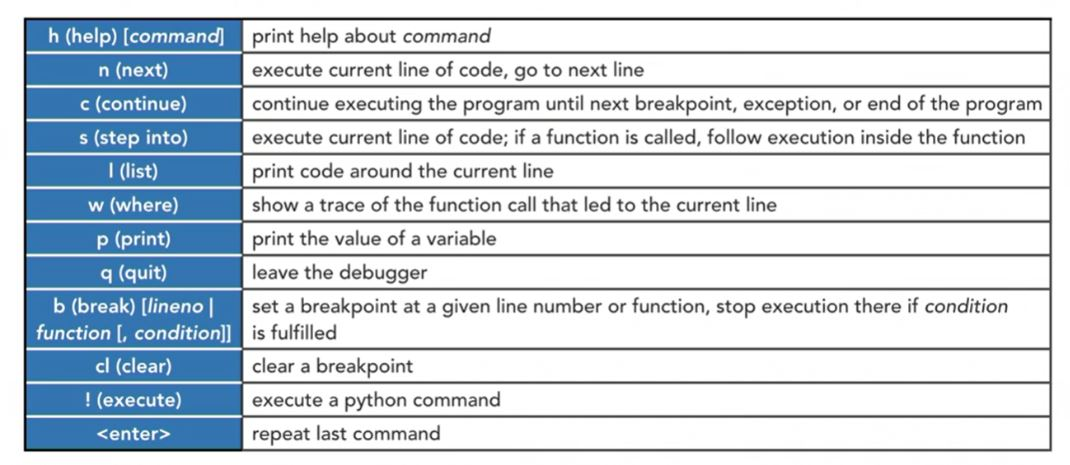


In [9]:
# Keeping this code block to show the results from debugger
from torch import optim
from IPython.core.debugger import set_trace
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0
    
    for images, labels in trainloader:
        set_trace()
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 332, in set_trace
    sys.settrace(self.trace_dispatch)



> <ipython-input-9-e03d77dd2c22>(13)<module>()
     11     for images, labels in trainloader:
     12         set_trace()
---> 13         optimizer.zero_grad()
     14         output = model(images)
     15         loss = criterion(output, labels)

ipdb> p
*** SyntaxError: unexpected EOF while parsing
ipdb> p(i)
0
ipdb> n
> <ipython-input-9-e03d77dd2c22>(14)<module>()
     12         set_trace()
     13         optimizer.zero_grad()
---> 14         output = model(images)
     15         loss = criterion(output, labels)
     16         loss.backward()

ipdb> n
> <ipython-input-9-e03d77dd2c22>(15)<module>()
     13         optimizer.zero_grad()
     14         output = model(images)
---> 15         loss = criterion(output, labels)
     16         loss.backward()
     17         optimizer.step()

ipdb> n
AttributeError: 'NoneType' object has no attribute 'dim'
> <ipython-input-9-e03d77dd2c22>(15)<module>()
     13         optimizer.zero_grad()
     14         output = model(images)
---> 1


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 357, in set_quit
    sys.settrace(None)



BdbQuit: ignored

In [13]:
# Same code as above block but this code runs fine as we have added a return statement in the forward method
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 25

for i in range(num_epochs):
    cum_loss = 0
    
    for images, labels in trainloader:
      #  set_trace()
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 0.4903399174782767
Training loss: 0.4560762962330379
Training loss: 0.43280977334803356
Training loss: 0.4154893405306568
Training loss: 0.40140329377610545
Training loss: 0.38998129479348786
Training loss: 0.3789616476561723
Training loss: 0.36969587278327964
Training loss: 0.3615726033475862
Training loss: 0.3537981955449718
Training loss: 0.34570493029633054
Training loss: 0.3389168531814618
Training loss: 0.3327334886516081
Training loss: 0.3271518763798132
Training loss: 0.3216187894852685
Training loss: 0.31567304988087874
Training loss: 0.3104357546183473
Training loss: 0.3058988606847171
Training loss: 0.30051693997022183
Training loss: 0.29597742915121733
Training loss: 0.29143228255577686
Training loss: 0.28698749031657095
Training loss: 0.2828055677621731
Training loss: 0.27857625898299443
Training loss: 0.27498568214777946


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

In [15]:
ps = torch.exp(logps)
ps

tensor([[6.5530e-06, 2.3310e-07, 1.3075e-06, 3.4068e-07, 1.0388e-05, 5.3397e-02,
         1.0624e-06, 2.5749e-02, 5.9370e-04, 9.2024e-01]])

In [16]:
nps = ps.numpy()[0]
nps

array([6.5530294e-06, 2.3309804e-07, 1.3075397e-06, 3.4068020e-07,
       1.0387684e-05, 5.3397227e-02, 1.0624466e-06, 2.5749087e-02,
       5.9370318e-04, 9.2024004e-01], dtype=float32)

<BarContainer object of 10 artists>

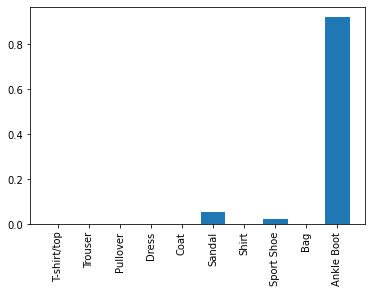

In [17]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoe','Bag','Ankle Boot']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

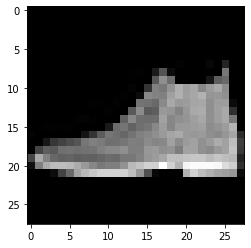

In [18]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')